In [ ]:
# Uncomment and run if you do not have these packages installed or are outdated
#!pip install scikit-learn --upgrade --quiet

# Data Preprocessing: Discretization and Normalization

  This notebook show some of the distretization and normalization
techniques explained in the course. The main libraries that are used are scikit learn ans kemlglearn

In [ ]:
from sklearn import datasets
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import seaborn as sns

iris = datasets.load_iris()
col = ['r', 'g', 'b']
lc = [col[i] for i in iris['target']]

## Attributes Discretization

We will use the iris dataset as exaple, the following  plot corresponds to  two of the attributes of the Iris dataset. These are continuous values that can be discretize in different ways to a range of values.

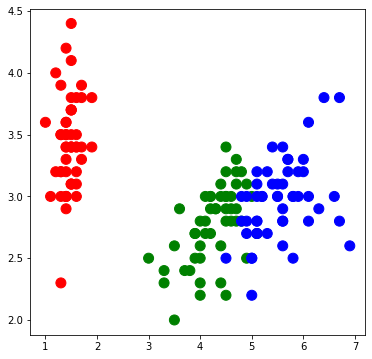

In [ ]:
fig = plt.figure(figsize=(6,6))
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=lc,s=100);

We can begin discretizing the attributes using equal bins (5 in this examples), the plot represents the 5x5 possible combinations, one combination can have many data points. The number of bins is arbitrary and should be djusted depending on the knowlege about the data or the
    specific application.

In [ ]:
@interact(bins = (3,9,1))
def g(bins=5):
    disc = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')
    disc.fit(iris['data'])
    irisdisc = disc.transform(iris['data'])
    fig = plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    plt.scatter(irisdisc[:, 2], irisdisc[:, 1], c=lc,s=100)
    plt.subplot(1,2,2)
    sns.histplot(irisdisc[:, 2],stat='probability',bins=bins)
    sns.kdeplot(x=iris['data'][:,2], shade=True,  color="r");

interactive(children=(IntSlider(value=5, description='bins', max=9, min=3), Output()), _dom_classes=('widget-i…

Using frequency distretization obtains also a 5x5 grid of combinations
but the distribution of the data points changes. This should be more faithful to the distribution of the data along the dimension, so sections with less probability will correspond to wider ranges and sections with more
probability.

In [ ]:
@interact(bins = (3,9,1))
def g(bins=5):
    disc = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='quantile')
    disc.fit(iris['data'])
    irisdisc = disc.transform(iris['data'])
    fig = plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    plt.scatter(irisdisc[:, 2], irisdisc[:, 1], c=lc,s=100)
    plt.subplot(1,2,2)
    sns.histplot(irisdisc[:, 2],stat='probability',bins=bins)
    sns.kdeplot(x=iris['data'][:,2], shade=True,  color="r");

interactive(children=(IntSlider(value=5, description='bins', max=9, min=3), Output()), _dom_classes=('widget-i…

## Data normalization

Data normalization standardizes the attributes so their scales do not influence the comparisons, first we will use a range normalization for the iris dataset, the only difference that we can observe in the plot is the change of scale (plots already scale the ranges of the attributes to maintain a 1:1 proportion), but we can see the difference compared with the original data.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, QuantileTransformer

mx = MinMaxScaler()
fdata = mx.fit_transform(iris['data'])
@interact(v = (0,3,1))
def g(v=0):
    fig = plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.scatter(fdata[:, v], fdata[:, (v+1)%4], c=lc,s=100);
    plt.subplot(1,2,2)
    sns.kdeplot(x=iris['data'][:,v], shade=True, color="g")
    sns.kdeplot(fdata[:,v] , shade=True,  color="r");


interactive(children=(IntSlider(value=0, description='v', max=3), Output()), _dom_classes=('widget-interact',)…

We can now use a standard score normalization assuming gaussian data, as before the only change that we can observe is the change in the scale of the axis of the plot, but we can see the difference compared with the original data.

In [ ]:
std = StandardScaler()
fdata = std.fit_transform(iris['data'])
@interact(v = (0,3,1))
def g(v=0):
    fig = plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.scatter(fdata[:, v], fdata[:, (v+1)%4], c=lc,s=100);
    plt.subplot(1,2,2)
    sns.kdeplot(x=iris['data'][:,v], shade=True, color="g")
    sns.kdeplot(fdata[:,v] , shade=True,  color="r");

interactive(children=(IntSlider(value=0, description='v', max=3), Output()), _dom_classes=('widget-interact',)…

With the quantile transformation we can obtain a "normal" or "uniform" distribution by mapping the CDF of the original data to the CDF of the targer distribution, this can distort the data, but it can be useful when the methods we will use need the data to have a specific distribution.

Notice that we can perform the mapping even when the distribution is complex.

In [ ]:
qt = QuantileTransformer(n_quantiles=100, output_distribution='uniform')
fdata = qt.fit_transform(iris['data'])
@interact(v = (0,3,1))
def g(v=0):
    fig = plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.scatter(fdata[:, v], fdata[:, (v+1)%4], c=lc,s=100);
    plt.subplot(1,2,2)
    sns.kdeplot(x=iris['data'][:,v], shade=True, color="g")
    sns.kdeplot(fdata[:,v] , shade=True,  color="r");

interactive(children=(IntSlider(value=0, description='v', max=3), Output()), _dom_classes=('widget-interact',)…

In [ ]:
qt = QuantileTransformer(n_quantiles=25, output_distribution='normal')
fdata = qt.fit_transform(iris['data'])
@interact(v = (0,3,1))
def g(v=0):
    fig = plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.scatter(fdata[:, v], fdata[:, (v+1)%4], c=lc,s=100);
    plt.subplot(1,2,2)
    sns.kdeplot(x=iris['data'][:,v], shade=True, color="g")
    sns.kdeplot(fdata[:,v] , shade=True,  color="r");

interactive(children=(IntSlider(value=0, description='v', max=3), Output()), _dom_classes=('widget-interact',)…

The power transformation applies a parameterized function to obtain a more gaussian distribution if possible

In [ ]:
pt = PowerTransformer()
fdata = pt.fit_transform(iris['data'])
@interact(v = (0,3,1))
def g(v=0):
    fig = plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.scatter(fdata[:, v], fdata[:, (v+1)%4], c=lc,s=100);
    plt.subplot(1,2,2)
    sns.kdeplot(x=iris['data'][:,v], shade=True, color="g")
    sns.kdeplot(fdata[:,v] , shade=True,  color="r");

interactive(children=(IntSlider(value=0, description='v', max=3), Output()), _dom_classes=('widget-interact',)…